In [ ]:
#Import all the necessary libraries

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [2]:
import seaborn as sns

In [3]:
from encodings.aliases import aliases

In [4]:
%matplotlib inline

Searching For The Encoding And Reading The File

In [5]:
alias_values = set(aliases.values())

for encoding in set(aliases.values()):
    try:
        df=pd.read_csv('C:\\Users\\d_bul\\Downloads\\crime.csv', nrows=10, encoding=encoding) # read in only 10 lines for faster read
        print('successful', encoding)
    except:
        pass

successful cp273
successful cp863
successful cp932
successful ptcp154
successful cp850
successful iso8859_11
successful iso8859_6
successful cp037
successful cp1253
successful gbk
successful cp1258
successful iso8859_8
successful cp864
successful cp855
successful kz1048
successful cp865
successful utf_16_be
successful koi8_r
successful cp858
successful cp866
successful mbcs
successful cp862
successful cp1140
successful cp1255
successful cp1254
successful iso8859_9
successful cp1125
successful cp775
successful cp869
successful iso8859_3
successful mac_iceland
successful iso8859_14
successful cp860
successful gb18030
successful iso8859_13
successful big5hkscs
successful iso8859_15
successful iso8859_5
successful iso8859_2
successful mac_cyrillic
successful iso8859_7
successful mac_greek
successful cp861
successful iso8859_4
successful cp857
successful cp949
successful cp1256
successful cp1250
successful iso8859_16
successful mac_latin2
successful mac_turkish
successful cp1026
successful 

In [6]:
crime = pd.read_csv('C:\\Users\\d_bul\\Downloads\\crime.csv', encoding='iso8859_13')

In [7]:
crime.head()

,INCIDENT_NUMBER,OFFENSE_CODE,OFFENSE_CODE_GROUP,OFFENSE_DESCRIPTION,DISTRICT,REPORTING_AREA,SHOOTING,OCCURRED_ON_DATE,YEAR,MONTH,DAY_OF_WEEK,HOUR,UCR_PART,STREET,Lat,Long,Location
0,I182070945,619,Larceny,LARCENY ALL OTHERS,D14,808,NaN,2018-09-02 13:00:00,2018,9,Sunday,13,Part One,LINCOLN ST,42.357791,-71.139371,"(42.35779134, -71.13937053)"
1,I182070943,1402,Vandalism,VANDALISM,C11,347,NaN,2018-08-21 00:00:00,2018,8,Tuesday,0,Part Two,HECLA ST,42.306821,-71.060300,"(42.30682138, -71.06030035)"
2,I182070941,3410,Towed,TOWED MOTOR VEHICLE,D4,151,NaN,2018-09-03 19:27:00,2018,9,Monday,19,Part Three,CAZENOVE ST,42.346589,-71.072429,"(42.34658879, -71.07242943)"
3,I182070940,3114,Investigate Property,INVESTIGATE PROPERTY,D4,272,NaN,2018-09-03 21:16:00,2018,9,Monday,21,Part Three,NEWCOMB ST,42.334182,-71.078664,"(42.33418175, -71.07866441)"
4,I182070938,3114,Investigate Property,INVESTIGATE PROPERTY,B3,421,NaN,2018-09-03 21:05:00,2018,9,Monday,21,Part Three,DELHI ST,42.275365,-71.090361,"(42.27536542, -71.09036101)"


In [8]:
crime.shape

(319073, 17)

Remove Duplicates

In [9]:
crime.duplicated().sum()

np.int64(23)

In [10]:
crime.drop_duplicates(inplace=True)

In [11]:
crime.info()

<class 'pandas.core.frame.DataFrame'>
Index: 319050 entries, 0 to 319072
Data columns (total 17 columns):
 #   Column               Non-Null Count   Dtype  
---  ------               --------------   -----  
 0   INCIDENT_NUMBER      319050 non-null  object 
 1   OFFENSE_CODE         319050 non-null  int64  
 2   OFFENSE_CODE_GROUP   319050 non-null  object 
 3   OFFENSE_DESCRIPTION  319050 non-null  object 
 4   DISTRICT             317285 non-null  object 
 5   REPORTING_AREA       319050 non-null  object 
 6   SHOOTING             1019 non-null    object 
 7   OCCURRED_ON_DATE     319050 non-null  object 
 8   YEAR                 319050 non-null  int64  
 9   MONTH                319050 non-null  int64  
 10  DAY_OF_WEEK          319050 non-null  object 
 11  HOUR                 319050 non-null  int64  
 12  UCR_PART             318960 non-null  object 
 13  STREET               308179 non-null  object 
 14  Lat                  299052 non-null  float64
 15  Long                 2

In [12]:
crime['OCCURRED_ON_DATE'] = pd.to_datetime(df['OCCURRED_ON_DATE'])

Explore the dataset

In [13]:
crime.info()

<class 'pandas.core.frame.DataFrame'>
Index: 319050 entries, 0 to 319072
Data columns (total 17 columns):
 #   Column               Non-Null Count   Dtype         
---  ------               --------------   -----         
 0   INCIDENT_NUMBER      319050 non-null  object        
 1   OFFENSE_CODE         319050 non-null  int64         
 2   OFFENSE_CODE_GROUP   319050 non-null  object        
 3   OFFENSE_DESCRIPTION  319050 non-null  object        
 4   DISTRICT             317285 non-null  object        
 5   REPORTING_AREA       319050 non-null  object        
 6   SHOOTING             1019 non-null    object        
 7   OCCURRED_ON_DATE     10 non-null      datetime64[ns]
 8   YEAR                 319050 non-null  int64         
 9   MONTH                319050 non-null  int64         
 10  DAY_OF_WEEK          319050 non-null  object        
 11  HOUR                 319050 non-null  int64         
 12  UCR_PART             318960 non-null  object        
 13  STREET             

In [14]:
crime.describe(include='object') 

,INCIDENT_NUMBER,OFFENSE_CODE_GROUP,OFFENSE_DESCRIPTION,DISTRICT,REPORTING_AREA,SHOOTING,DAY_OF_WEEK,UCR_PART,STREET,Location
count,319050,319050,319050,317285,319050,1019,319050,318960,308179,319050
unique,282517,67,244,12,879,1,7,4,4657,18194
top,I162030584,Motor Vehicle Accident Response,SICK/INJURED/MEDICAL - PERSON,B2,,Y,Friday,Part Three,WASHINGTON ST,"(0.00000000, 0.00000000)"
freq,13,37132,18783,49940,20250,1019,48489,158537,14192,19998


In [15]:
crime.columns[np.sum(crime.isnull())!=0]

C:\Users\d_bul\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.12_qbz5n2kfra8p0\LocalCache\local-packages\Python312\site-packages\numpy\_core\fromnumeric.py:84: FutureWarning: The behavior of DataFrame.sum with axis=None is deprecated, in a future version this will reduce over both axes and return a scalar. To retain the old behavior, pass axis=0 (or do not pass axis)
  return reduction(axis=axis, out=out, **passkwargs)


Index(['DISTRICT', 'SHOOTING', 'OCCURRED_ON_DATE', 'UCR_PART', 'STREET', 'Lat',
       'Long'],
      dtype='object')

In [16]:
crime['OFFENSE_DESCRIPTION'].nunique()

244

Answering Questions

In [ ]:
# What are the most common crimes in terms of offense group?
crime['OFFENSE_CODE_GROUP'].value_counts()

OFFENSE_CODE_GROUP
Motor Vehicle Accident Response              37132
Larceny                                      25935
Medical Assistance                           23540
Investigate Person                           18749
Other                                        18073
                                             ...  
HUMAN TRAFFICKING                                7
INVESTIGATE PERSON                               4
Biological Threat                                2
HUMAN TRAFFICKING - INVOLUNTARY SERVITUDE        2
Burglary - No Property Taken                     2
Name: count, Length: 67, dtype: int64

In [18]:
top_crimes = crime['OFFENSE_CODE_GROUP'].value_counts()[:10]


In [19]:
display(top_crimes/crime.shape[0])

OFFENSE_CODE_GROUP
Motor Vehicle Accident Response    0.116383
Larceny                            0.081288
Medical Assistance                 0.073782
Investigate Person                 0.058765
Other                              0.056646
Drug Violation                     0.051857
Simple Assault                     0.049604
Vandalism                          0.048312
Verbal Disputes                    0.041056
Towed                              0.035377
Name: count, dtype: float64

<Axes: title={'center': 'Top 10 Offense Groups'}, xlabel='OFFENSE_CODE_GROUP'>

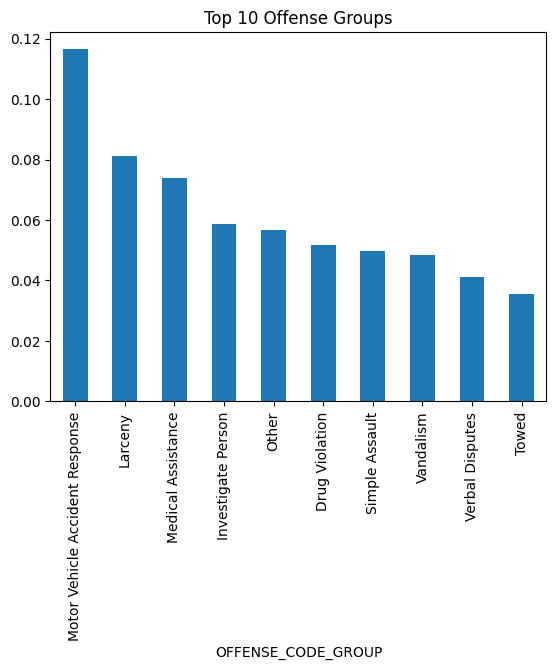

In [ ]:
# Creating a bar chart of the Top 10 offense groups
(top_crimes/crime.shape[0]).plot(kind='bar', title = 'Top 10 Offense Groups')


<Axes: title={'center': 'Number of Crimes Per Year'}, xlabel='YEAR'>

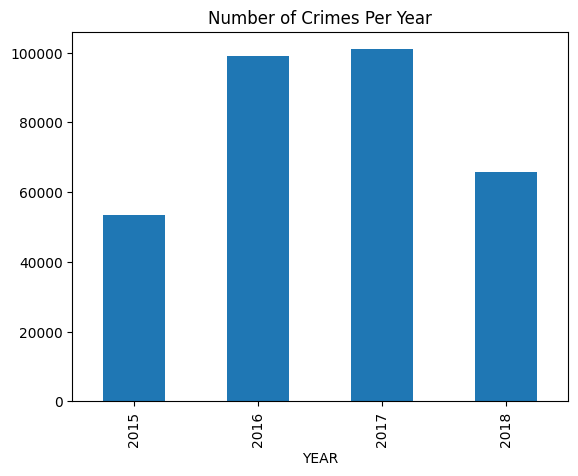

In [ ]:
# In which year were the most crimes committed?
crime.groupby('YEAR').count()['INCIDENT_NUMBER'].plot(kind='bar', title='Number of Crimes Per Year')

<Axes: title={'center': 'Number of Crimes By Day Of Week'}, xlabel='DAY_OF_WEEK'>

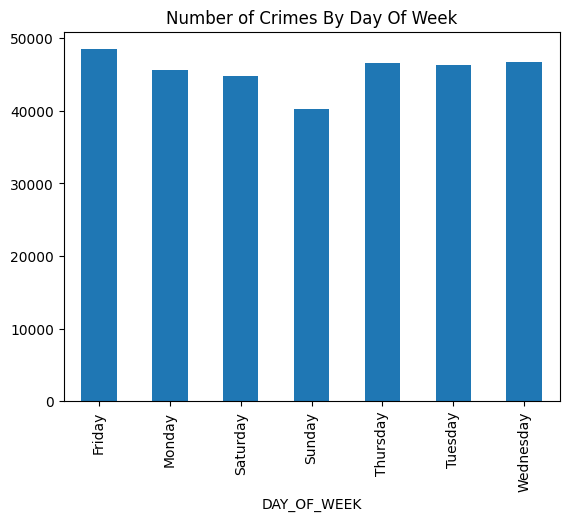

In [22]:
crime.groupby('DAY_OF_WEEK').count()['INCIDENT_NUMBER'].plot(kind='bar', title='Number of Crimes By Day Of Week')

<Axes: title={'center': 'Number of Crimes By Hour'}, xlabel='HOUR'>

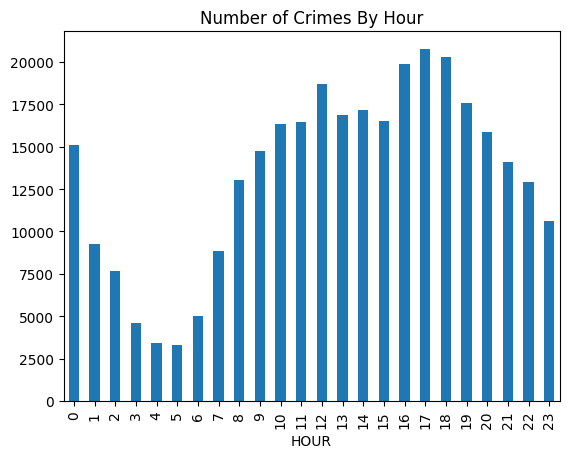

In [ ]:
# Are there more crimes during specific hours?
crime.groupby('HOUR').count()['INCIDENT_NUMBER'].plot(kind='bar', title='Number of Crimes By Hour')

In [ ]:
# On what days and during which hours are the most crimes committed?
week_and_hours = crime.groupby(['HOUR', 'DAY_OF_WEEK']).count()['INCIDENT_NUMBER'].unstack()

In [32]:
week_and_hours

DAY_OF_WEEK,Friday,Monday,Saturday,Sunday,Thursday,Tuesday,Wednesday
HOUR,,,,,,,
0,2161,2000,2612,2400,2039,1897,1997
1,1275,1058,1855,2043,1077,1017,942
2,952,846,1827,1855,774,641,798
3,532,583,957,1119,526,460,412
4,441,386,672,704,436,399,370
5,485,417,478,517,508,462,444
6,768,709,530,543,866,787,823
7,1398,1352,1078,758,1405,1418,1441
8,2041,2046,1515,1123,2037,2145,2135


In [ ]:

week_and_hours = week_and_hours[['Monday', 'Tuesday', 'Wednesday', 'Thursday', 'Friday', 'Saturday', 'Sunday']]

In [34]:
week_and_hours

DAY_OF_WEEK,Monday,Tuesday,Wednesday,Thursday,Friday,Saturday,Sunday
HOUR,,,,,,,
0,2000,1897,1997,2039,2161,2612,2400
1,1058,1017,942,1077,1275,1855,2043
2,846,641,798,774,952,1827,1855
3,583,460,412,526,532,957,1119
4,386,399,370,436,441,672,704
5,417,462,444,508,485,478,517
6,709,787,823,866,768,530,543
7,1352,1418,1441,1405,1398,1078,758
8,2046,2145,2135,2037,2041,1515,1123


<Axes: xlabel='DAY_OF_WEEK', ylabel='HOUR'>

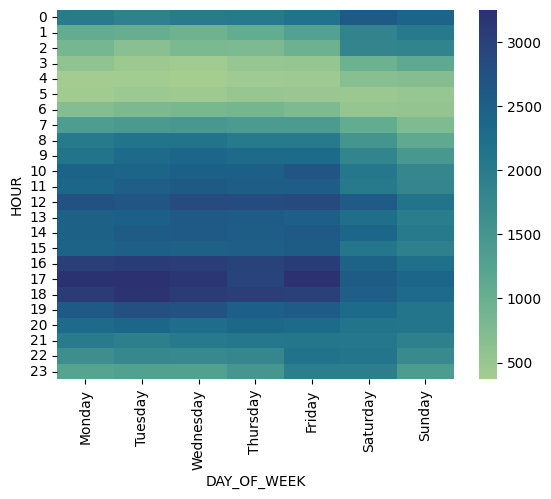

In [ ]:
#Creating a heatmap
sns.heatmap(week_and_hours, cmap=sns.color_palette("crest", as_cmap=True))

In [44]:
avg_crime = crime.groupby(['YEAR', 'MONTH']).count()['INCIDENT_NUMBER'].mean()
print("The average number of crimes is " + str(avg_crime))

The average number of crimes is 7976.25


np.float64(6610.104166666667)

In [40]:
year_and_month = crime.groupby(['YEAR', 'MONTH']).count()['INCIDENT_NUMBER'].unstack()

In [ ]:
#In which districts were the most crimes commmitted on yearly basis? 
year_crime = crime.groupby(['YEAR', 'DISTRICT']).count()['INCIDENT_NUMBER'].unstack()

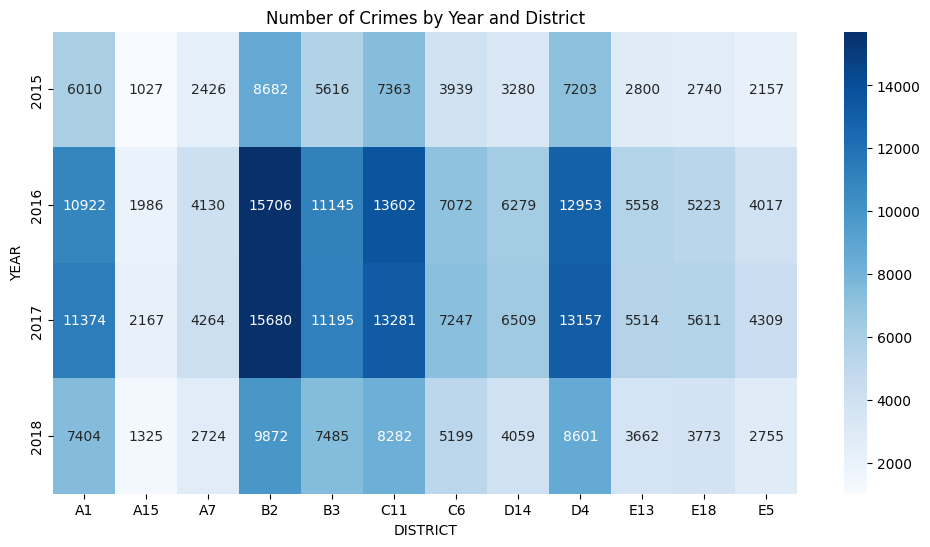

In [ ]:
import matplotlib.pyplot as plt


plt.figure(figsize=(12, 6))
sns.heatmap(year_crime, annot=True, fmt='d', cmap='Blues')
plt.title('Number of Crimes by Year and District')
plt.show()